# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection and Data Processing

In [2]:
# loading the dataset to a pandas DataFrame
sonar_data = pd.read_csv('C:/Users/Shashank Mishra/Documents/Rock_vs_Mine_Prediction/Copy of sonar data.csv', header=None)

In [3]:
 # Display the first few rows of the 'sonar_data' DataFrame
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
# Get the dimensions (rows, columns) of the 'sonar_data' DataFrame
sonar_data.shape 

(208, 61)

In [5]:
# Generate summary statistics for the 'sonar_data' DataFrame
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
sonar_data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
45,0.0408,0.0653,0.0397,0.0604,0.0496,0.1817,0.1178,0.1024,0.0583,0.2176,...,0.0062,0.0129,0.0184,0.0069,0.0198,0.0199,0.0102,0.0070,0.0055,R
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M
47,0.0373,0.0281,0.0232,0.0225,0.0179,0.0733,0.0841,0.1031,0.0993,0.0802,...,0.0008,0.0045,0.0024,0.0006,0.0073,0.0096,0.0054,0.0085,0.0060,R
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063,R
85,0.0365,0.1632,0.1636,0.1421,0.1130,0.1306,0.2112,0.2268,0.2992,0.3735,...,0.0110,0.0071,0.0205,0.0164,0.0063,0.0078,0.0094,0.0110,0.0068,R


In [7]:
sonar_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [9]:
# Count the occurrences of unique values in column 60 of the 'sonar_data' DataFrame
sonar_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

# Split the data into training and testing sets

In [10]:
# Separating the data into features (X) and the target variable (Y)
X = sonar_data.drop(columns=60)
Y = sonar_data[60]

In [11]:
# Printing the features (X) and target variable (Y)
print(X)
print(Y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=1)


# Standardize the data (important for K-NN and SVM)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Initialize models  
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', C=1.0)

In [15]:
# Lists to store results 
models = [logistic_model, knn_model, svm_model]
model_names = ['Logistic Regression', 'K-NN', 'SVM']
training_accuracies = []
test_accuracies = []

In [16]:
# Train models and collect accuracy results $
for model in models:
    model.fit(X_train, Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train, train_prediction))
    test_accuracies.append(accuracy_score(Y_test, test_prediction))

# Logistic Regression

In [17]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
logistic_train_prediction = logistic_model.predict(X_train)
logistic_test_prediction = logistic_model.predict(X_test)

logistic_train_accuracy = accuracy_score(Y_train, logistic_train_prediction)
logistic_test_accuracy = accuracy_score(Y_test, logistic_test_prediction)

# K-Nearest Neighbors (K-NN)

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of n_neighbors
knn_model.fit(X_train, Y_train)
knn_train_prediction = knn_model.predict(X_train)
knn_test_prediction = knn_model.predict(X_test)

knn_train_accuracy = accuracy_score(Y_train, knn_train_prediction)
knn_test_accuracy = accuracy_score(Y_test, knn_test_prediction)



# Support Vector Machines (SVM)

In [19]:
svm_model = SVC(kernel='rbf', C=1.0)  # You can experiment with different kernel functions and C values
svm_model.fit(X_train, Y_train)
svm_train_prediction = svm_model.predict(X_train)
svm_test_prediction = svm_model.predict(X_test)

svm_train_accuracy = accuracy_score(Y_train, svm_train_prediction)
svm_test_accuracy = accuracy_score(Y_test, svm_test_prediction)


# Print the results

In [20]:
# Print the results
for model, train_acc, test_acc in zip(model_names, training_accuracies, test_accuracies):
    print(f'{model} Training Accuracy: {train_acc}')
    print(f'{model} Test Accuracy: {test_acc}')

Logistic Regression Training Accuracy: 0.9197860962566845
Logistic Regression Test Accuracy: 0.7619047619047619
K-NN Training Accuracy: 0.8983957219251337
K-NN Test Accuracy: 0.9047619047619048
SVM Training Accuracy: 0.9786096256684492
SVM Test Accuracy: 0.8571428571428571


In [21]:
# Create a DataFrame to store the accuracy results
results = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': training_accuracies,
    'Test Accuracy': test_accuracies
})

# Making Pridicting system

In [22]:
input_data = (0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872, 0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.0000, 0.8874, 0.8024, 0.7818, 0.5212, 0.4052, 0.3957, 0.3914, 0.3250, 0.3200, 0.3271, 0.2767, 0.4423, 0.2028, 0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.1840, 0.1970, 0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.0530, 0.0742, 0.0409, 0.0061, 0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.0140, 0.0049, 0.0052, 0.0044)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1, -1)

logistic_result = logistic_model.predict(input_reshape)
knn_result = knn_model.predict(input_reshape)
svm_result = svm_model.predict(input_reshape)

if logistic_result == 1:
    print('Logistic Regression Result: Object is Rock')
else:
    print('Logistic Regression Result: Object is Mine')

if knn_result == 1:
    print('K-NN Result: Object is Rock')
else:
    print('K-NN Result: Object is Mine')

if svm_result == 1:
    print('SVM Result: Object is Rock')
else:
    print('SVM Result: Object is Mine')


Logistic Regression Result: Object is Mine
K-NN Result: Object is Mine
SVM Result: Object is Mine


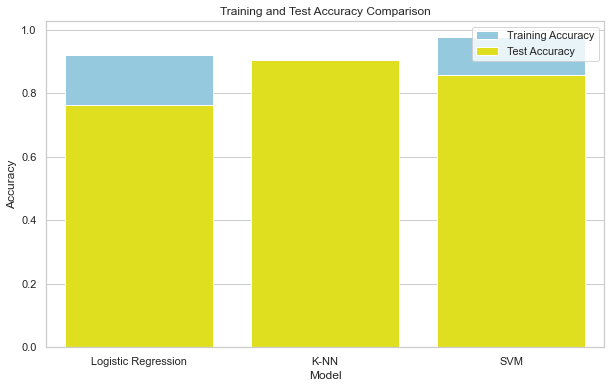

In [23]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot for training and test accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Training Accuracy", data=results, color='skyblue', label="Training Accuracy")
sns.barplot(x="Model", y="Test Accuracy", data=results, color='yellow', label="Test Accuracy")
plt.title("Training and Test Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")

# Show the plot
plt.show()